# Experiments on KuHar Resampled to 30Hz

This notebook will perform basic experiments on the balanced KuHar and MotionSense datasets with the following steps:
1. Quick load train, test and validation CSV subsets from the balanced KuHar dataset using `PandasDatasetsIO` helper
2. Subclassing the `Dataset` interface using `PandasMultiModalDataset`
3. Apply the fourier transform on the dataset
4. Apply t-SNE in both datasets together in time and frequency domains

The experiments will evaluate the distrbution between KuHar and MotionSense on the balanced datasets in both time and frequency domains.

## Common imports and definitions

In [1]:
from pathlib import Path  # For defining dataset Paths
import sys                # For include librep package

# This must be done if librep is not installed via pip,
# as this directory (examples) is appart from librep package root
sys.path.append("..")

# Third party imports
import pandas as pd
import numpy as np

# Librep imports
from librep.utils.dataset import PandasDatasetsIO          # For quick load train, test and validation CSVs
from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

2022-09-12 00:26:47.729774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 00:26:47.729795: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Loading data
Change the path to use in other datasets

In [2]:
# Path for KuHar resampled to 30Hz view with the same activities (and labels numbers)
# It is assumed that the directory will contain (train.csv, test.csv and validation.csv)
dataset_path_kuhar = Path("../data/views/KuHar/resampled_view_30Hz")
dataset_path_motionsense = Path("../data/views/MotionSense/resampled_view_30Hz")

Once paths is defined, we can load the CSV as pandas dataframes

In [3]:
# Kuhar/Motionsense dataframes
train_kuhar, validation_kuhar, test_kuhar = PandasDatasetsIO(dataset_path_kuhar).load()
train_motionsense, validation_motionsense, test_motionsense = PandasDatasetsIO(dataset_path_motionsense).load()

In [4]:
all_data_kuhar = pd.concat([train_kuhar, validation_kuhar, test_kuhar])
all_data_motionsense = pd.concat([train_motionsense, validation_motionsense, test_motionsense])

X = [0 for i in range(len(all_data_kuhar))]
all_data_kuhar['Dataset'] = X

X = [1 for i in range(len(all_data_motionsense))]
all_data_motionsense['Dataset'] = X

## Removing activities that don't exist in MotionSense and changing their codes.

In [5]:
activity_kuhar = {
        0: "Stand",
        1: "Sit",
        11: "Walk",
        14: "Run",
        15: "Stair-up",
        16: "Stair-down",
}

activity_motionsense = {
        3: "std",
        2: "sit",
        4: "wlk",
        5: "jog",
        1: "ups",
        0: "dws"
}

kh = list(activity_kuhar.keys())
ms = list(activity_motionsense.keys())
l = [k for k in range(6)]
kh

[0, 1, 11, 14, 15, 16]

In [6]:
all_data_kuhar = all_data_kuhar[all_data_kuhar['activity code'].isin(kh)]

In [7]:
all_data_kuhar['activity code'].unique()

array([ 0,  1, 11, 14, 15, 16])

In [8]:
for k in range(6):
    all_data_kuhar['activity code'] = all_data_kuhar['activity code'].replace(kh[k], k+6)

In [9]:
all_data_kuhar['activity code'].unique()

array([ 6,  7,  8,  9, 10, 11])

## Creating a Librep dataset from pandas dataframes

Change the features to use in other datasets

In [10]:
features_motionsense = list(all_data_motionsense.columns[1:-6]) + ['Dataset', 'activity code']
# all_data_motionsense.head()

In [11]:
features_kuhar = list(all_data_kuhar.columns[1:-10]) + ['Dataset', 'activity code']
# all_data_kuhar

In [12]:
# features_kuhar

In [13]:
X1 = np.array(all_data_kuhar[features_kuhar])
X2 = np.array(all_data_motionsense[features_motionsense])

In [14]:
all_data = pd.DataFrame(np.concatenate((X1, X2)), columns=list(features_kuhar))
all_data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-82,gyro-z-83,gyro-z-84,gyro-z-85,gyro-z-86,gyro-z-87,gyro-z-88,gyro-z-89,Dataset,activity code
0,0.003620,-0.023688,-0.002657,0.010371,-0.005858,0.010423,-0.019593,0.000303,0.045433,-0.004613,...,0.004720,0.003066,0.002235,0.002746,0.003216,0.002385,0.004016,0.003377,0.0,6.0
1,-0.005823,0.012494,-0.012503,-0.002116,0.025957,-0.012833,-0.025845,-0.011941,0.012807,0.004603,...,0.001823,0.001692,0.000443,-0.001092,-0.000615,-0.003112,0.002459,0.003056,0.0,6.0
2,-0.039278,0.003864,0.008927,-0.024887,0.022435,0.003431,-0.038931,0.003359,0.009394,-0.028853,...,0.002829,0.001145,0.004210,0.003512,0.003344,0.004968,0.003306,0.003442,0.0,6.0
3,-0.001728,-0.018312,0.013927,0.015426,0.007332,-0.012372,0.006893,-0.002433,0.012821,-0.010669,...,-0.001025,0.000604,-0.000815,-0.001659,0.000037,-0.001675,-0.002496,-0.001294,0.0,6.0
4,-0.022981,0.014871,-0.036310,0.033512,-0.016733,0.019930,-0.016637,0.007568,-0.002753,0.007763,...,0.003199,0.007891,0.003509,-0.000226,0.002749,0.003864,0.002099,0.004560,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,-0.257739,-0.387816,-0.173476,0.401424,0.062274,0.182838,0.316312,0.797721,0.122884,-0.211215,...,-0.419386,-0.537688,-0.142900,-0.064428,1.354706,1.892422,1.264995,-2.081829,1.0,5.0
6308,-0.417850,-0.813467,-1.772154,0.110662,0.612424,-0.210375,-3.099767,-1.809887,1.201129,1.294668,...,3.360833,2.770319,1.119818,-1.302019,-2.736272,-2.743174,-5.340605,-9.005032,1.0,5.0
6309,-0.319039,-0.012836,-0.030483,0.055985,-0.254981,0.211430,-0.041847,-0.099284,-0.506961,0.054123,...,0.218662,-0.496350,-0.307832,-0.091498,0.026900,-0.440731,-0.454998,-0.905865,1.0,5.0
6310,0.348365,0.525269,0.059976,-0.090873,-0.357481,-0.309874,-0.269182,-0.843015,0.002578,0.313414,...,0.660084,-0.148731,0.088839,-0.309311,0.312411,-0.292259,-0.482670,0.631022,1.0,5.0


In [15]:
features = features_kuhar[:-2]
# features

## t-SNE Transform

In [16]:
from sklearn.manifold import TSNE

tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data[features])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = all_data['Dataset']

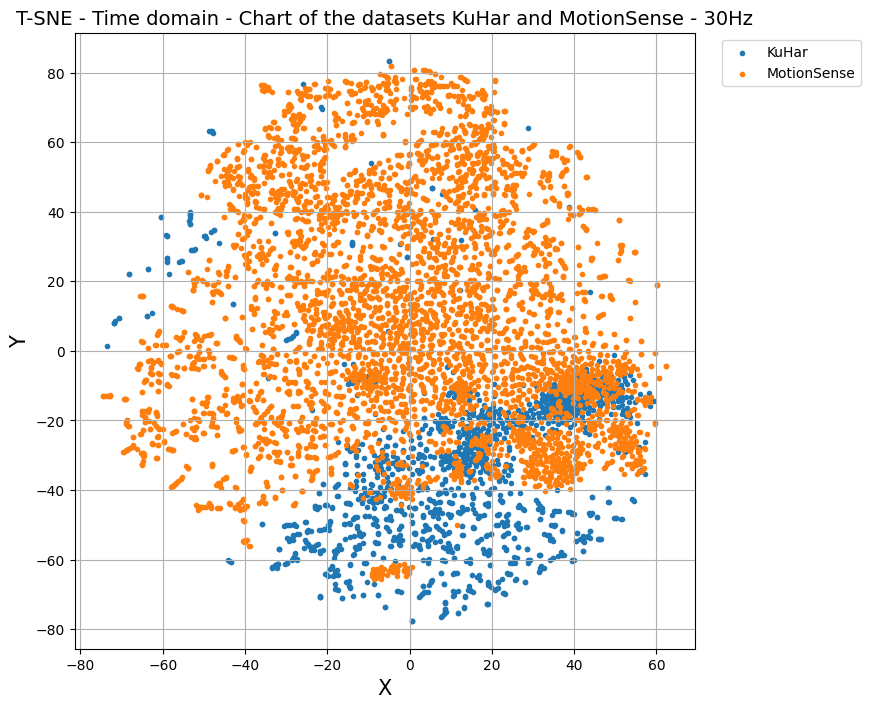

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title("T-SNE - Time domain - Chart of the datasets KuHar and MotionSense - 30Hz", fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('KuHar')
    else:
        labels.append('MotionSense')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
plt.show()

Lets show the datasets in the frequency domain and compare with the result above

## Creating a Librep dataset from pandas dataframes

Change the features to use in other datasets

In [19]:
# Kuhar and MotionSense features to select
features = [
    "accel-x",
    "accel-y",
    "accel-z",
    "gyro-x",
    "gyro-y",
    "gyro-z"
]

# Creating the datasets

# Train
all_data_multimodal = PandasMultiModalDataset(
    all_data,
    feature_prefixes=features,
    label_columns="Dataset",
    as_array=True
)

## Fourier Transform

In [20]:
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [21]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(transforms=[fft_transform], new_window_name_prefix="fft.")

### Use FFT in the data

In [22]:
all_data_multimodal_fft = transformer(all_data_multimodal)
all_data_multimodal_fft.X

array([[3.13384994e-02, 1.68121633e-01, 9.05549650e-02, ...,
        5.92594004e-03, 1.10474894e-02, 7.03162882e-03],
       [2.30704315e-02, 1.23651598e-01, 6.28149230e-02, ...,
        8.26119084e-03, 3.20484735e-03, 5.24385686e-03],
       [7.81909007e-02, 7.24224293e-02, 1.34035957e-01, ...,
        1.17237633e-02, 8.03545237e-03, 2.37891069e-02],
       ...,
       [1.25378580e+00, 1.29129674e+00, 9.38914062e-01, ...,
        1.17296740e+00, 7.80122121e-01, 1.21739774e+00],
       [3.12722220e+00, 2.91728302e+00, 2.09904721e+00, ...,
        1.26141987e+00, 5.88594950e+00, 1.62984581e+00],
       [1.52514540e+00, 1.44493422e+00, 1.36297853e+00, ...,
        1.90046437e+00, 1.36809620e+00, 1.49000302e+00]])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


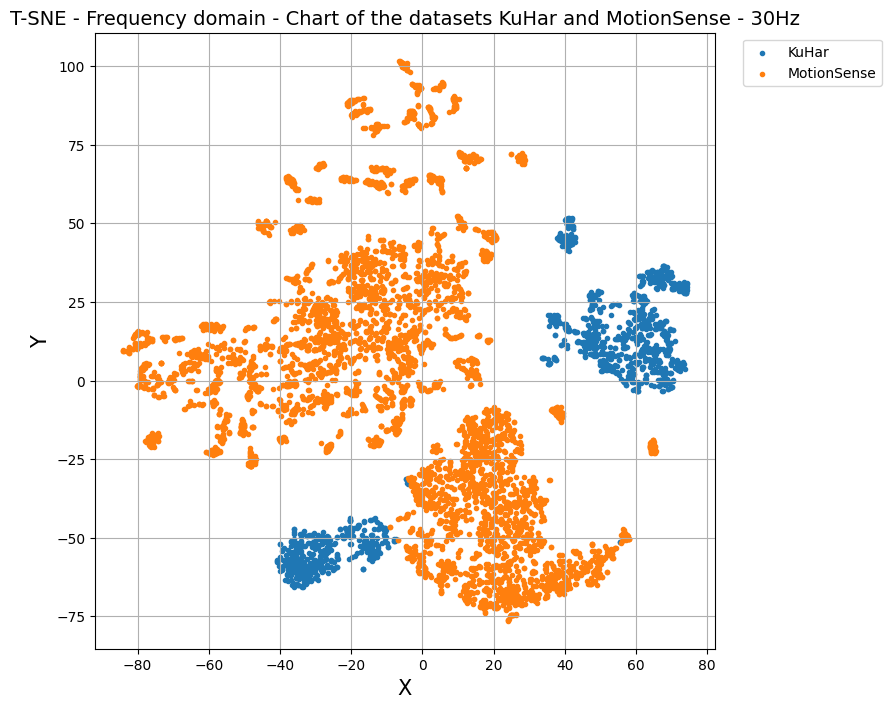

In [23]:
tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data_multimodal_fft.X)

tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = all_data_multimodal_fft.y

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title("T-SNE - Frequency domain - Chart of the datasets KuHar and MotionSense - 30Hz", fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('KuHar')
    else:
        labels.append('MotionSense')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
plt.show()

## Use t-SNE to show only the classes run and jogging 

In [24]:
def transformMultimodal(X):
    # Kuhar and MotionSense features to select
    features = [
        "accel-x",
        "accel-y",
        "accel-z",
        "gyro-x",
        "gyro-y",
        "gyro-z"
    ]

    # Creating the datasets

    # Train
    data_multimodal = PandasMultiModalDataset(
        X,
        feature_prefixes=features,
        label_columns="activity code",
        as_array=True
    )
    return data_multimodal

def tsne(data, num_classes, classes, features):

    X = data[data['activity code'].isin(num_classes)]
    X_new = transformMultimodal(X)

    fft_transform = FFT(centered = True)
    transformer = TransformMultiModalDataset(transforms=[fft_transform], new_window_name_prefix="fft.")
    data_multimodal_fft = transformer(X_new)
    
    tsne_model = TSNE(random_state=42)
    tsne_df = tsne_model.fit_transform(data_multimodal_fft.X)

    tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
    tsne_df
    tsne_df["class"] = data_multimodal_fft.y

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X', fontsize=15)
    ax.set_ylabel('Y', fontsize=15)
    ax.set_title("T-SNE - Frequency domain - Chart of the datasets KuHar and MotionSense - 30Hz", fontsize=14)

    labels = []
    for c, ds in tsne_df.groupby(["class"]):
        ax.scatter(ds["X"], ds["Y"], marker='.')
        if c  == num_classes[0]:
            labels.append(classes[num_classes[0]])
        else:
            labels.append(classes[num_classes[1]])

    ax.legend(labels, bbox_to_anchor = (1.28, 1.))
    ax.grid()
    plt.show()

In [25]:
pares = [[0, 11], [1, 10], [2, 7], [3, 6], [4, 8], [5, 9]]

labels_ms = ['Downstairs', 'Upstairs', 'Sitting', 'Standing', 'Walking', 'Jogging']
labels_kh = ["Stand", "Sit", "Walk", "Run", "Stair-up", "Stair-down"]

classes = []
for c in labels_ms:
    classes.append(c + ' - MS')
for c in labels_kh:
    classes.append(c + ' - KH')
classes

['Downstairs - MS',
 'Upstairs - MS',
 'Sitting - MS',
 'Standing - MS',
 'Walking - MS',
 'Jogging - MS',
 'Stand - KH',
 'Sit - KH',
 'Walk - KH',
 'Run - KH',
 'Stair-up - KH',
 'Stair-down - KH']

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


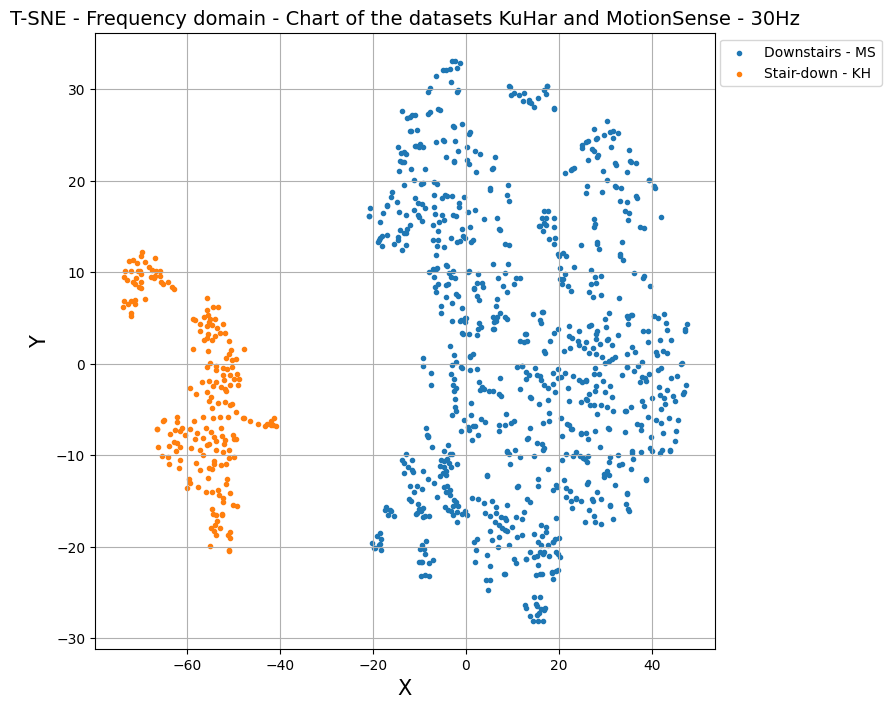

In [26]:
tsne(all_data, pares[0], classes, features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


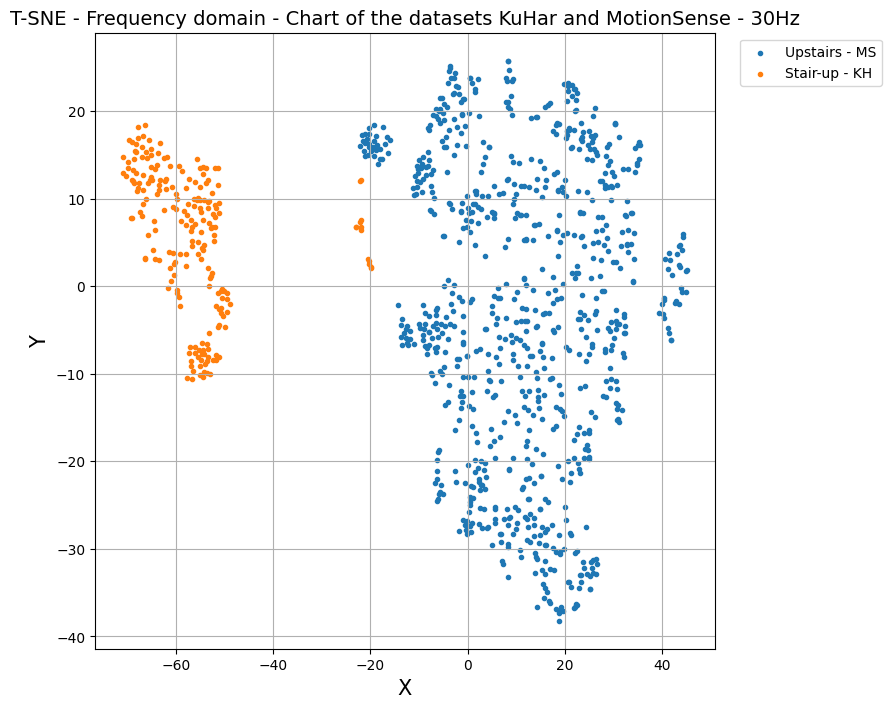

In [27]:
tsne(all_data, pares[1], classes, features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


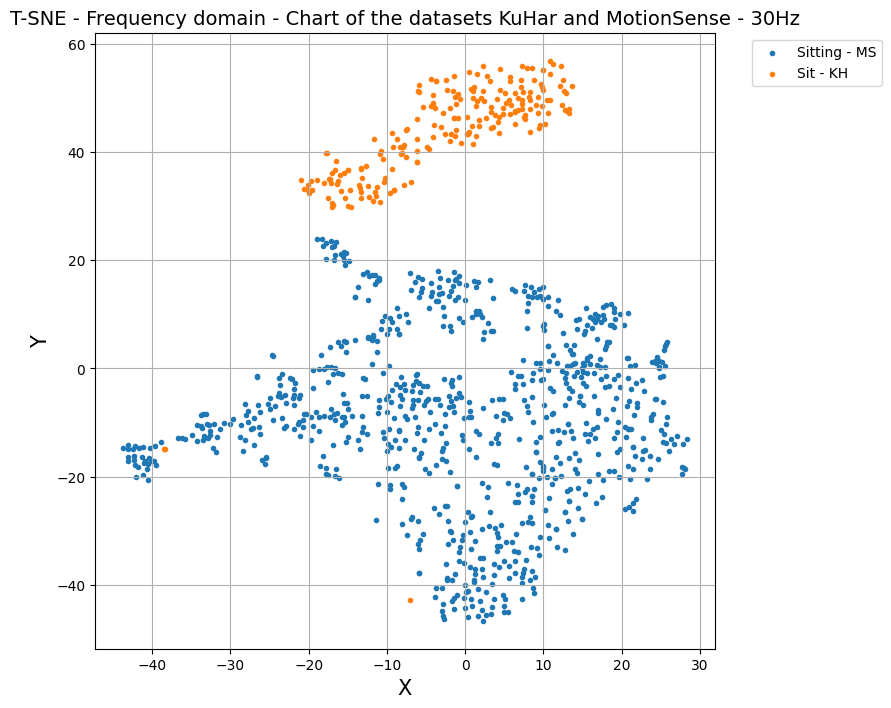

In [28]:
tsne(all_data, pares[2], classes, features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


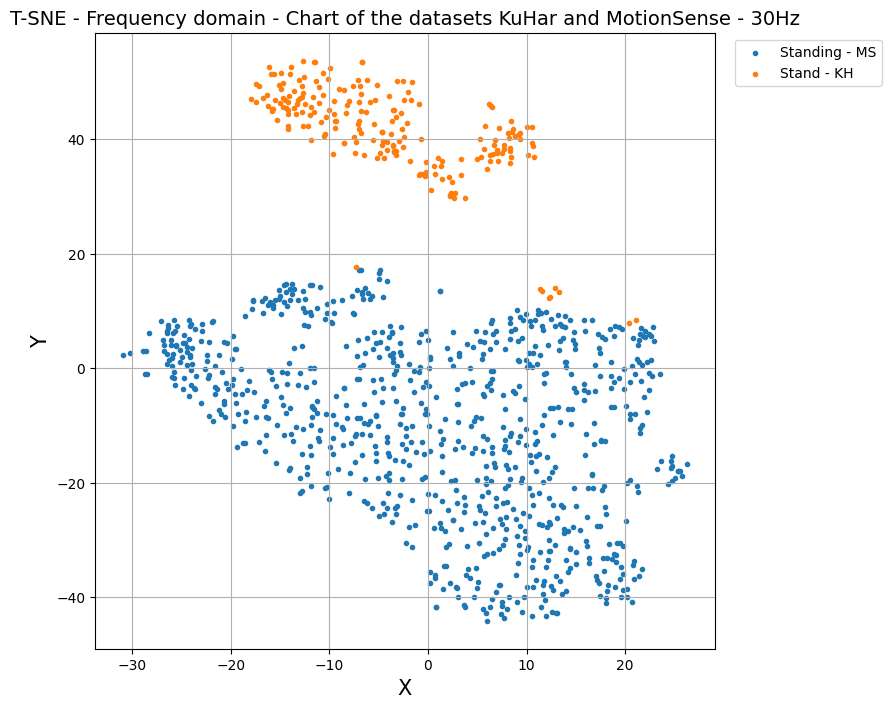

In [29]:
tsne(all_data, pares[3], classes, features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


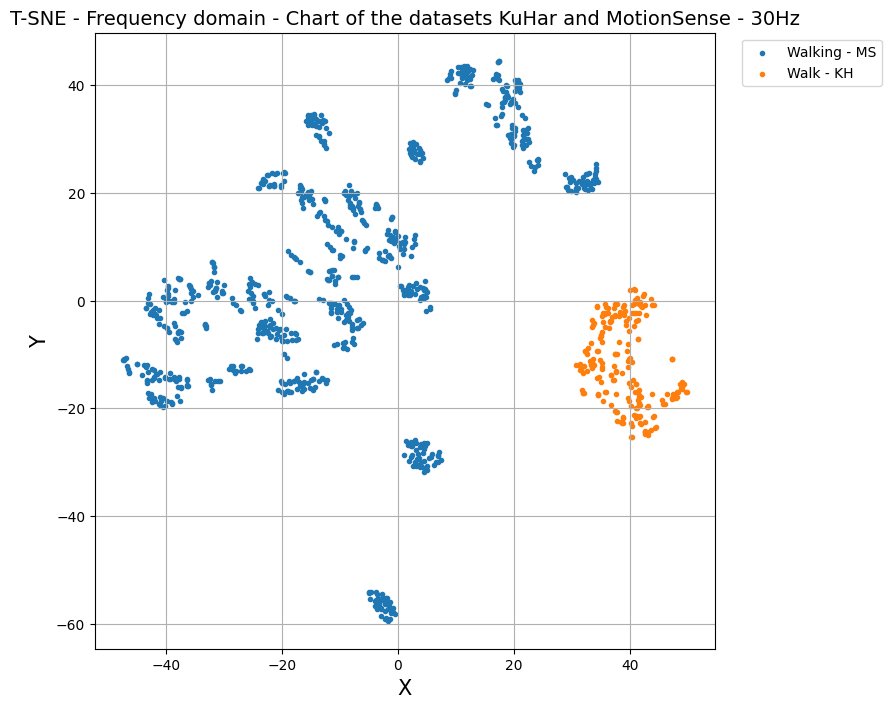

In [30]:
tsne(all_data, pares[4], classes, features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


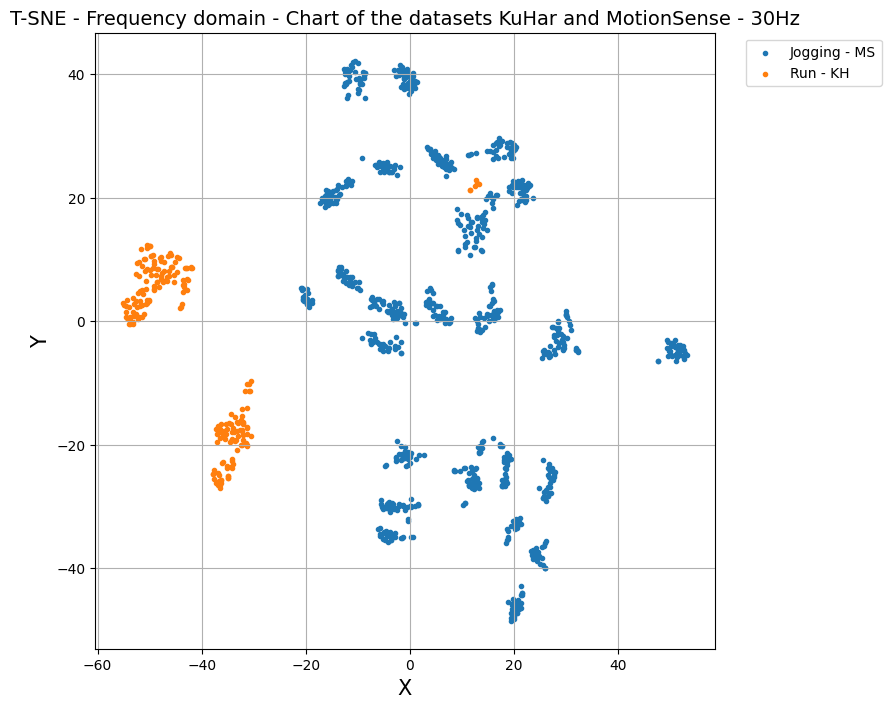

In [31]:
tsne(all_data, pares[5], classes, features)

In [32]:
train_kuhar = pd.concat([train_kuhar, validation_kuhar])
train_motionsense = pd.concat([train_motionsense, validation_motionsense])

X = [0 for i in range(len(train_kuhar))]
train_kuhar['Dataset'] = X

X = [1 for i in range(len(train_motionsense))]
train_motionsense['Dataset'] = X

X = [0 for i in range(len(test_kuhar))]
test_kuhar['Dataset'] = X

X = [0 for i in range(len(test_motionsense))]
test_motionsense['Dataset'] = X

In [33]:
X1 = np.array(train_kuhar[features_kuhar])
X2 = np.array(train_motionsense[features_motionsense])
train_all_data = pd.DataFrame(np.concatenate((X1, X2)), columns=list(features_kuhar))

X1 = np.array(test_kuhar[features_kuhar])
X2 = np.array(test_motionsense[features_motionsense])
test_all_data = pd.DataFrame(np.concatenate((X1, X2)), columns=list(features_kuhar))

train_all_data['Dataset'].describe()

count    7458.000000
mean        0.539019
std         0.498509
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Dataset, dtype: float64